# **<font color=#FF3399> Otimização Univariavel em Python de um Processo Quimico </font>**

DOI: 10.5281/zenodo.15084381

Monica Miranda Rodrigues



Cenário fictício para um processo de extração e concentração de compostos
![Cenário fictício](https://drive.google.com/uc?id=1rjGgcCX9oqTnZwfoPmkorTeUCr8J6YzC)



## **<font color=#FF3399> Modelagem Matemática: </font>**
Balanço de Massa por componente:

Q.x0 – Q.x – W. y = 0

Relação de Equilíbrio líquido liquido

y – k.x = 0

Avaliação Econômica:

Receita:

R = pBZD . W. y

Custo:

C = pB . W

Com isso pode-se aplicar os dados ao modelo de extrator em engenharia de processos a fim de obter a maximização do lucro (L).

L = R – C

Substitui as equações do balanço de massa e do Equilíbrio  na equação referente a avaliação econômica, e encontra o valor máximo do lucro derivando a equação. Tem-se então o valor ótimo  a partir da derivada de dL(x)/dx:

 \\( \frac{dL(x)}{dx} = −pBZD.Q + pB.Q.x0/x^2 \\) representa o valor máximo.


In [ ]:
#Variaveis especificadas:
Q = 1000 #kg/h
x0 = 0.01 # kg AB/A
#Parametros
k = 1.5 #constante de distribuição
pBZD = 7.0 # $/kg
pB = 0.01 # $/kg

In [ ]:
from sympy import diff, symbols, Eq, solve, simplify
import numpy as np
# L = R - C ; R = pBZD*W*y ; C = pB*W
# BM: Q.x0 - Q.x - W.y = 0 logo W = (Q*x0 - Q*x)/y; coeficiente de distribuição: y - kx = 0 logo y =k*x

In [ ]:
x = symbols('x')
R = pBZD*Q*x0 - pBZD*Q*x
C = pB*Q*x0/(k*x) - pB*Q/k
L = R - C
R=simplify(R)
C=simplify(C)
L=simplify(L)
#print(L)
#print(R)
#print(C)

#derivada primeira
der_pri_L = diff(L,x,1)
#print(der_pri_L)

In [ ]:
#Cria uma equação definindo a expressão igual a zero
equacao = Eq(der_pri_L,0)
#Resolver a equação para encontrar os valores de x que satisfazem a equação
solucoes = solve(equacao, x)
#print(solucoes)
for solucao in solucoes:
  lucro = L.subs(x, solucao)
  receita = R.subs(x, solucao)
  custo = C.subs(x, solucao)
  if solucao >0:
    print(f"Para x = {solucao:.4f}, o lucro em $ é de {lucro:.2f}, a receita em $ é de {receita:.2f} e o custo em $ é de {custo:.2f}.")

Para x = 0.0031, o lucro em $ é de 33.46, a receita em $ é de 48.40 e o custo em $ é de 14.94.


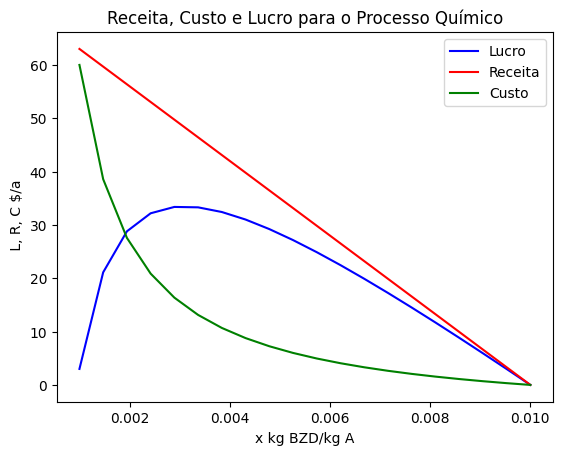

In [ ]:
#Plotando as funções:
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(0.001,0.01, 20)
R = pBZD*Q*x0 - pBZD*Q*x
C = pB*Q*x0/(k*x) - pB*Q/k
L = pBZD*Q*x0 - pBZD*Q*x - pB*Q*x0/(k*x) + pB*Q/k
R=simplify(R)
C=simplify(C)
L=simplify(L)
plt.plot(x,L, color='b', label = "Lucro")
plt.plot(x,R, color='r', label = "Receita")
plt.plot(x,C, color='g', label="Custo")
plt.xlabel("x kg BZD/kg A")
plt.ylabel(" L, R, C $/a")
plt.legend()
plt.title("Receita, Custo e Lucro para o Processo Químico")
plt.show()